# Compare tree (matrices)

In [1]:
import numpy as np

In [2]:
runName = 'ExampleRun'
dataDir = './../data/'
# Topo
trueTopo = np.load(dataDir+'np/'+runName+'_testTrueTopo.npy')
shuffledTrueTopo = np.load(dataDir+'np/'+runName+'_testTrueTopo.npy')
np.random.shuffle(shuffledTrueTopo)
njTopo = np.load(dataDir+'nj/'+runName+'_NJtopologyMatrices.npy')
nnTopo = np.load(dataDir+'np/'+runName+'_testPredictionsTopo.npy')

# Dist
trueDist = np.load(dataDir+'np/'+runName+'_testTrueDist.npy')
shuffledTrueDist = np.load(dataDir+'np/'+runName+'_testTrueDist.npy')
np.random.shuffle(shuffledTrueDist)
njDist = np.load(dataDir+'nj/'+runName+'_NJdistanceMatrices.npy')
nnDist = np.load(dataDir+'np/'+runName+'_testPredictionsDist.npy')

In [3]:
def rmseNP(np1, np2):
    ''' Take two one-dimensional numpy arrays
        Return the root-mean-squared-error
        '''
    return np.sqrt(((np1 - np2) ** 2).mean())      

In [4]:
def averageRmseNP(np1, np2):
    ''' Take two two-dimensional numpy arrays
        Loop over the first dimension
        calculate the rmse between the elements
        return the average of all the elements'''
    numberOfElements = np1.shape[0]
    totalRMSE = 0
    for i in range(numberOfElements):
        totalRMSE+=rmseNP(np1[i], np2[i])
    averageRMSE = totalRMSE/numberOfElements
    return averageRMSE

## Numeric Comparisons

In [5]:
print('Topography Predictions:\n')
print('nj vs true: ', averageRmseNP(njTopo, trueTopo))
print('nn vs true: ', averageRmseNP(nnTopo, trueTopo))
print('---compare to random---')
print('true vs shuffled: ', averageRmseNP(trueTopo, shuffledTrueTopo))

Topography Predictions:

nj vs true:  1.168361616515271
nn vs true:  1.3751641824052667
---compare to random---
true vs shuffled:  1.6749824454818567


In [6]:
print('Branch Length Predictions:\n')
print('nj vs true: ', averageRmseNP(njDist, trueDist))
print('nn vs true: ', averageRmseNP(nnDist, trueDist))
print('---compare to random---')
print('true vs shuffled: ', averageRmseNP(trueDist, shuffledTrueDist))

Branch Length Predictions:

nj vs true:  14.875178214881762
nn vs true:  10.633036342570584
---compare to random---
true vs shuffled:  14.499399994973569


## Graph some of the results

### TOPO

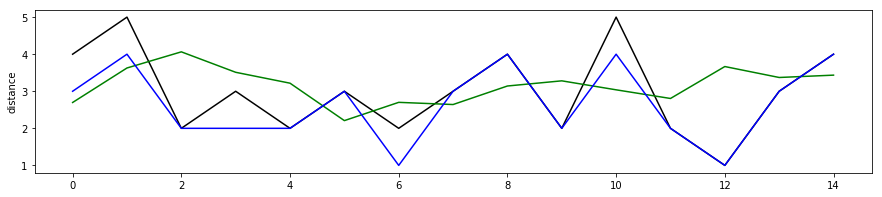

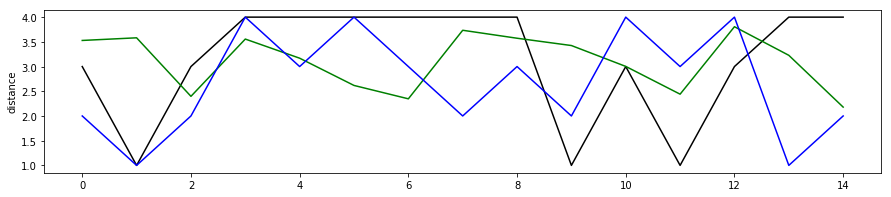

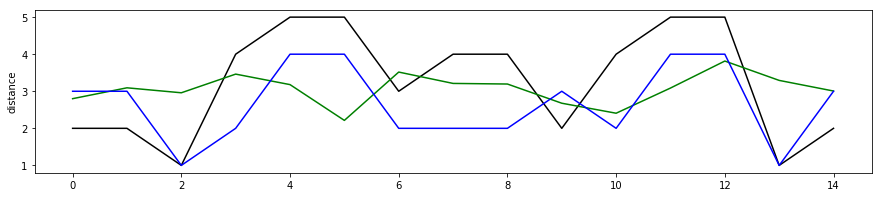

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
for index in range(3):
    trueTopo1 = trueTopo[index].tolist()
    nnTopo1 = nnTopo[index].tolist()
    njTopo1 = njTopo[index].tolist()
    plt.figure(figsize=(15,3))
    plt.plot(trueTopo1, color="black")
    plt.plot(nnTopo1, color="green")
    plt.plot(njTopo1, color="blue")
    plt.ylabel('distance')
    plt.show()

### Branch Length

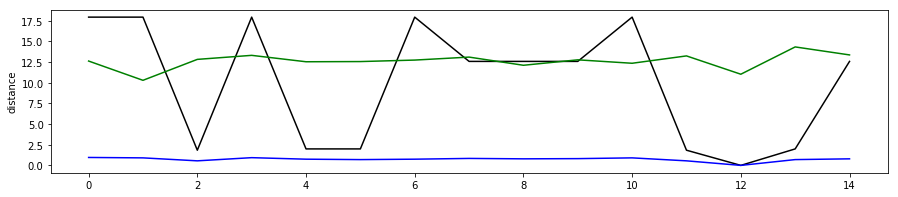

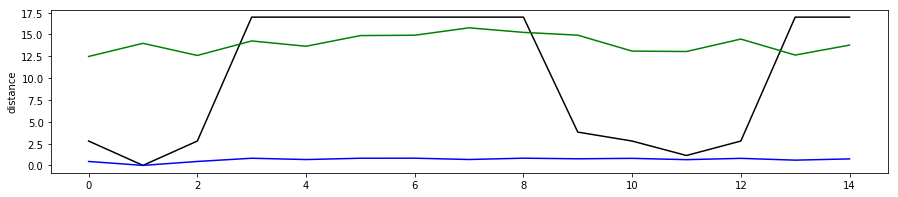

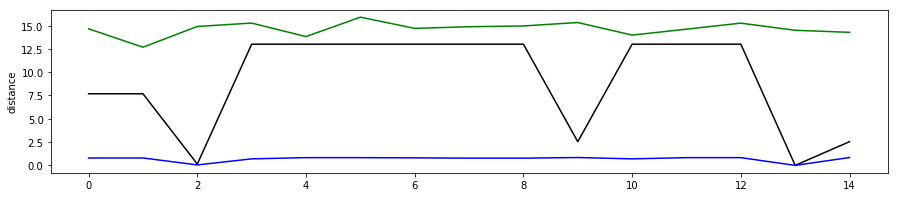

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
for index in range(3):
    trueDist1 = trueDist[index].tolist()
    nnDist1 = nnDist[index].tolist()
    njDist1 = njDist[index].tolist()
    plt.figure(figsize=(15,3))
    plt.plot(trueDist1, color="black")
    plt.plot(nnDist1, color="green")
    plt.plot(njDist1, color="blue")
    plt.ylabel('distance')
    plt.show()